## GO barplot

In [129]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.palettes import TolRainbow
import random

In [2]:
os.chdir('/media/HDD_4TB_1/jordi/cfuses_gnn_enrollhd_2024/')

# Results directory
results_dir = "data/ml_results/regressors_info/"

In [3]:
# Load data of each model
lasso = pd.read_csv(results_dir+"lasso_regressor_bsc_coefs.txt", sep='\t')
elasticnet = pd.read_csv(results_dir+"elastic_net_regressor_bsc_coefs.txt", sep='\t')
histXGBoost = pd.read_csv(results_dir+"histXGBoost_regressor_bsc_coefs.txt", sep='\t')
approxXGBoost = pd.read_csv(results_dir+"approxXGBoost_regressor_bsc_coefs.txt", sep='\t')


In [4]:
models = [lasso, elasticnet, histXGBoost, approxXGBoost]
model_names = ['Lasso', 'Elastic Net', 'Hist XGBoost', 'Approx XGBoost']

In [56]:
# Calculate the percentage distribution of GO categories for each model
distributions = []
for model in models:
    go_counts = model['GO'].value_counts(normalize=True) * 100
    distributions.append(go_counts)

In [171]:
# Set global font sizes
plt.rcParams.update({
    'axes.titlesize': 17,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.titlesize': 20
})

In [108]:
# Combine distributions into a single DataFrame
combined_df = pd.DataFrame(distributions).T.fillna(0)
combined_df.columns = model_names

In [165]:
# Select 15 distinct colors from Bokeh's TolRainbow palette
colors = list(TolRainbow[15])

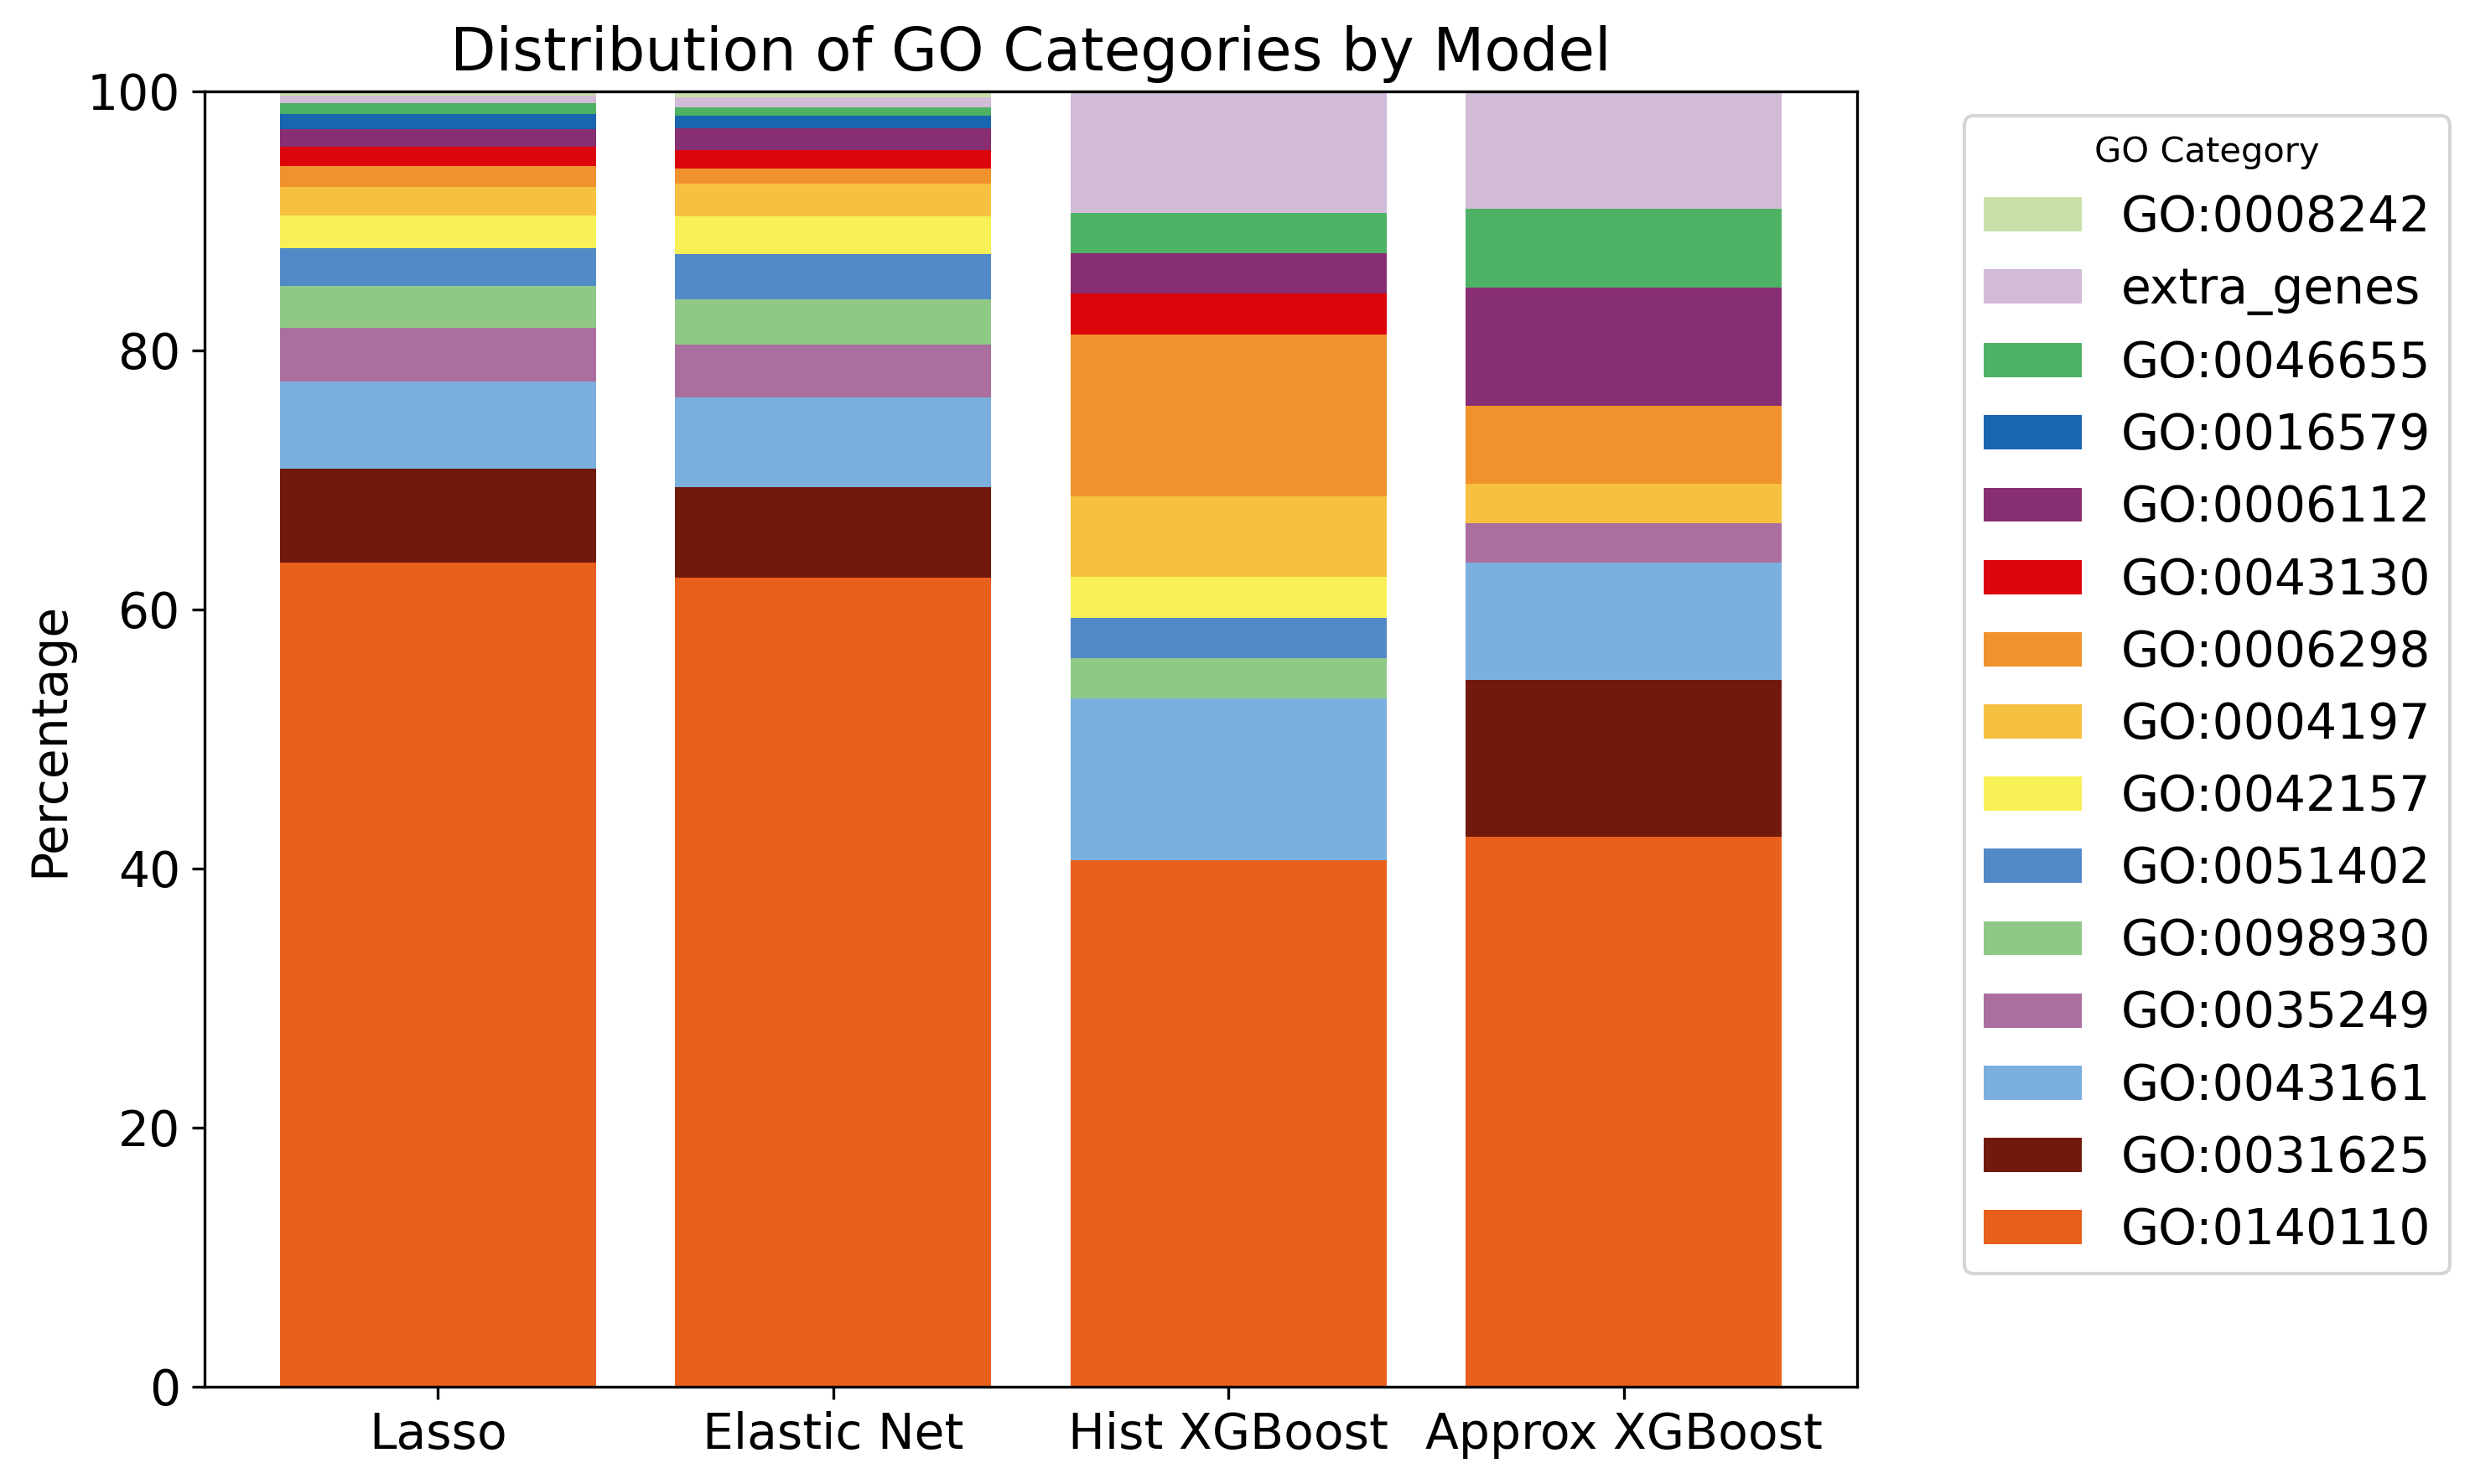

In [172]:
# Combine distributions into a single DataFrame
combined_df = pd.DataFrame(distributions).T.fillna(0)
combined_df.columns = model_names

# Shuffle the colors
# random.shuffle(colors)

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Plot stacked bar chart
bottom = None
bars = []
labels = []
for i, go_category in enumerate(combined_df.index):
    if bottom is None:
        bar = ax.bar(model_names, combined_df.loc[go_category], label=go_category, color=colors[i])
        bottom = combined_df.loc[go_category]
    else:
        bar = ax.bar(model_names, combined_df.loc[go_category], bottom=bottom, label=go_category, color=colors[i])
        bottom += combined_df.loc[go_category]
    bars.append(bar)
    labels.append(go_category)

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_title('Distribution of GO Categories by Model')

# Create a custom legend with the same order as combined_df.index, but reversed
handles = [bar[0] for bar in reversed(bars)]
labels = list(reversed(labels))
ax.legend(handles, labels, title='GO Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [173]:
snps_gene_go_tab = pd.read_csv("data/SNPs/snps_gene_GO_m3.txt", sep='\t')


In [174]:
len(snps_gene_go_tab)

613467